In [1]:
import numpy as np
import pandas as pd

In [2]:
import plotly.graph_objects as go
from IPython.display import IFrame

In [3]:
# plotly의 예제 코드를 그대로 돌려서 내용을 이해 
# Read data from a csv
z_data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/api_docs/mt_bruno_elevation.csv', index_col=None)

# #fig = go.Figure(data=[go.Surface(z=z_data.values)])
# fig = go.Figure(data=[go.Surface(z=df2['z'].values)])

# fig.update_layout(title='Mt Bruno Elevation', autosize=False,
#                   width=500, height=500,
#                   margin=dict(l=65, r=50, b=65, t=90))

# #fig.show()
# #plot({'data': data}, filename='d:/graph3.html')
# fig.write_html("d:/graph4.html")

In [4]:
# 데이터 구조를 파악 
z_data.head(10)

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,0,27.809850,49.61936,83.080670,116.66320,130.41400,150.72060,220.18710,156.15360,148.64160,...,49.96142,21.89279,17.025520,11.743170,14.752260,13.667100,5.677561,3.312340,1.156517,-0.147662
1,1,27.719660,48.55022,65.213740,95.27666,116.99640,133.90560,152.34120,151.93400,160.11390,...,33.08871,38.40972,44.248430,69.578600,4.019351,3.050024,3.039719,2.996142,2.967954,1.999594
2,2,30.426700,33.47752,44.809530,62.47495,77.43523,104.21530,102.73930,137.00040,186.07060,...,48.47132,74.71461,60.090900,7.073525,6.089851,6.537450,6.666096,7.306965,5.736840,3.625628
3,3,16.665490,30.10860,39.969520,44.12225,59.57512,77.56929,106.89250,166.55390,175.23810,...,60.55916,55.92124,15.172840,8.248324,36.680870,61.934130,20.268670,68.588190,46.498120,0.236010
4,4,8.815617,18.35160,8.658275,27.58590,48.62691,60.18013,91.32860,145.71090,116.06530,...,47.42691,69.20731,44.954680,29.171970,17.916740,16.255150,14.655590,17.260480,31.222450,46.717040
5,5,6.628881,10.41339,24.819390,26.08952,30.16050,52.30802,64.71007,76.30823,84.63686,...,140.26470,81.26501,56.457560,30.421640,17.287820,8.302431,2.981626,2.698536,5.886086,5.268358
6,6,21.839750,6.63927,18.970850,32.89204,43.15014,62.86014,104.66570,130.22940,114.84940,...,122.42210,123.96980,109.095200,98.419560,77.613740,32.490310,14.673440,7.370775,0.037110,0.642339
7,7,53.343030,26.79797,6.639270,10.88787,17.20440,56.18116,79.70141,90.84530,98.27675,...,68.17490,46.24076,39.938570,31.216530,36.883350,40.025250,117.429700,12.703280,1.729771,0.000000
8,8,25.667850,63.05717,22.141400,17.07400,41.74483,60.27227,81.42432,114.44400,102.32340,...,59.19355,42.47175,14.635980,6.944074,6.944075,27.749360,0.000000,0.000000,0.094494,0.077323
9,9,12.827000,69.20554,46.762930,13.96517,33.88744,61.82613,84.74799,121.12200,145.27410,...,79.34425,25.93483,6.944074,6.944074,6.944075,7.553681,0.000000,0.000000,0.000000,0.000000


In [5]:
# 아래 코드를 활용하여 서울시 30m DEM을 위의 데이터 구조처럼 변환 
# https://gis.stackexchange.com/questions/32995/fully-load-raster-into-a-numpy-array
from osgeo import gdal
import numpy as np
import math
#import osgeo
import os
import scipy

# Open Rasters 
Raster = gdal.Open("data/dem30.tif")

# Get Raster Band
RasterBand = Raster.GetRasterBand(1)

# Convert Raster to Array
rArray = np.array(Raster.GetRasterBand(1).ReadAsArray())

print(rArray)

[[65535 65535 65535 ... 65535 65535 65535]
 [65535 65535 65535 ... 65535 65535 65535]
 [65535 65535 65535 ... 65535 65535 65535]
 ...
 [65535 65535 65535 ... 65535 65535 65535]
 [65535 65535 65535 ... 65535 65535 65535]
 [65535 65535 65535 ... 65535 65535 65535]]


In [6]:
# 우리나라에 5천미터 넘는 산은 없으므로 65535 등을 0으로 치환
rArray[rArray >= 5000] = 0

In [7]:
# GIS와 일반 차트의 좌표계의 차이 - 뒤집어 줘야 함 
rArray2 = np.flipud(rArray)

In [8]:
rArray2

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rc('font', family='Malgun Gothic') #한글 폰트 적용시   #Malgun Gothic  NanumGothic

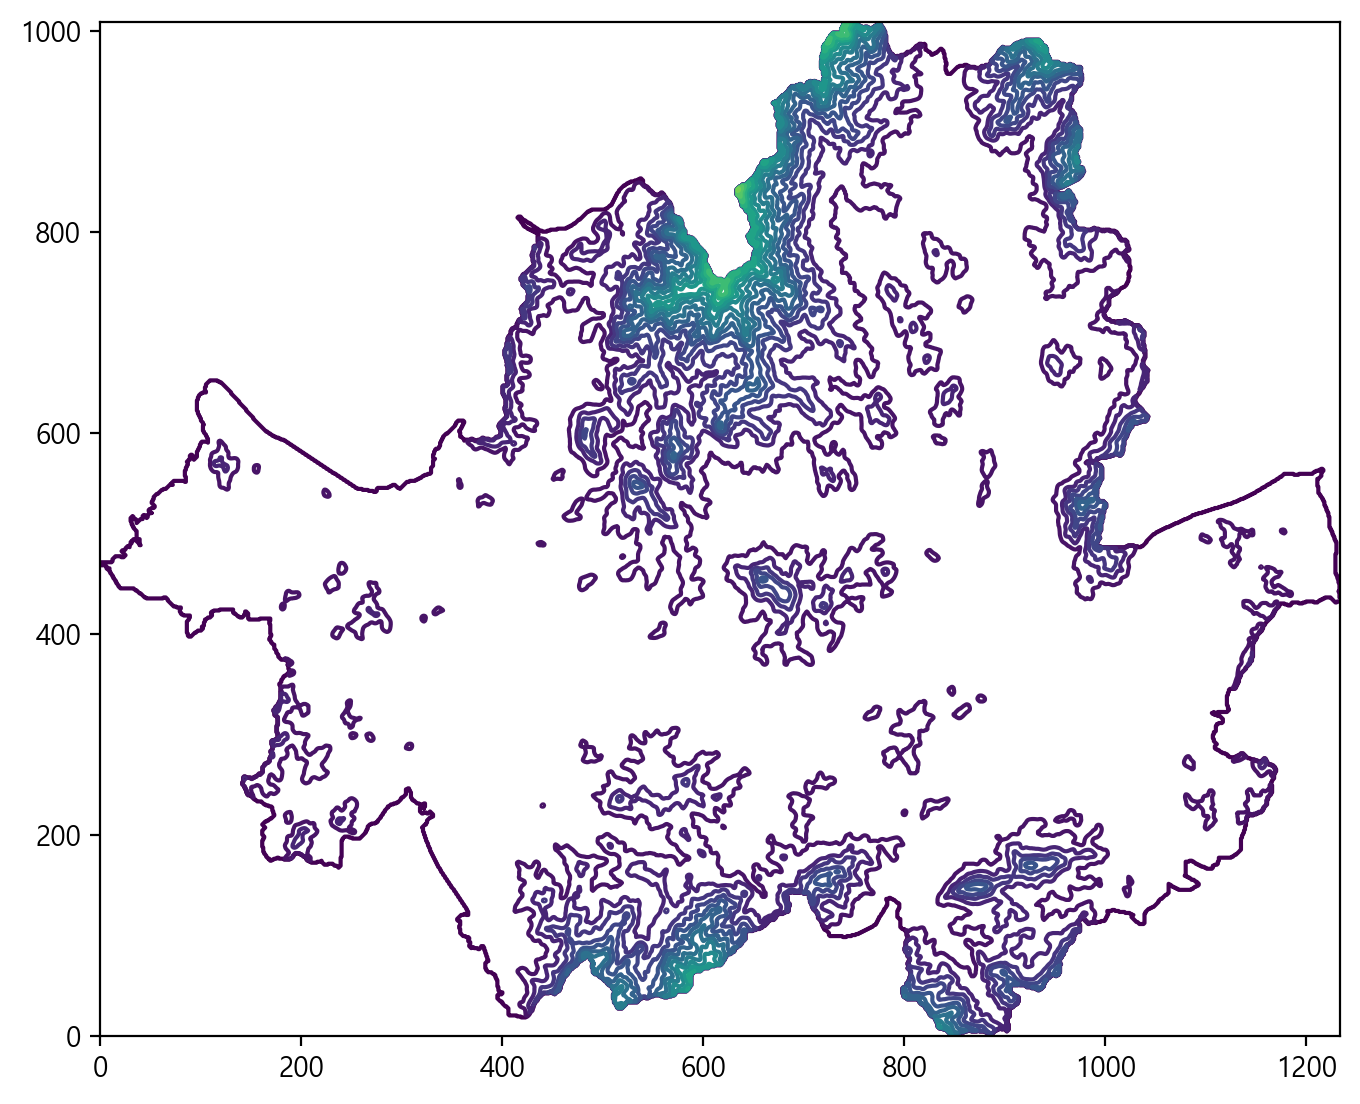

In [10]:
#Plot out data with Matplotlib's 'contour'
fig = plt.figure(figsize = (8, 8))
ax = plt.contour(rArray2, cmap = "viridis", levels = list(range(0, 1000, 50)))
plt.gca().set_aspect('equal') #, adjustable='box')
plt.show()

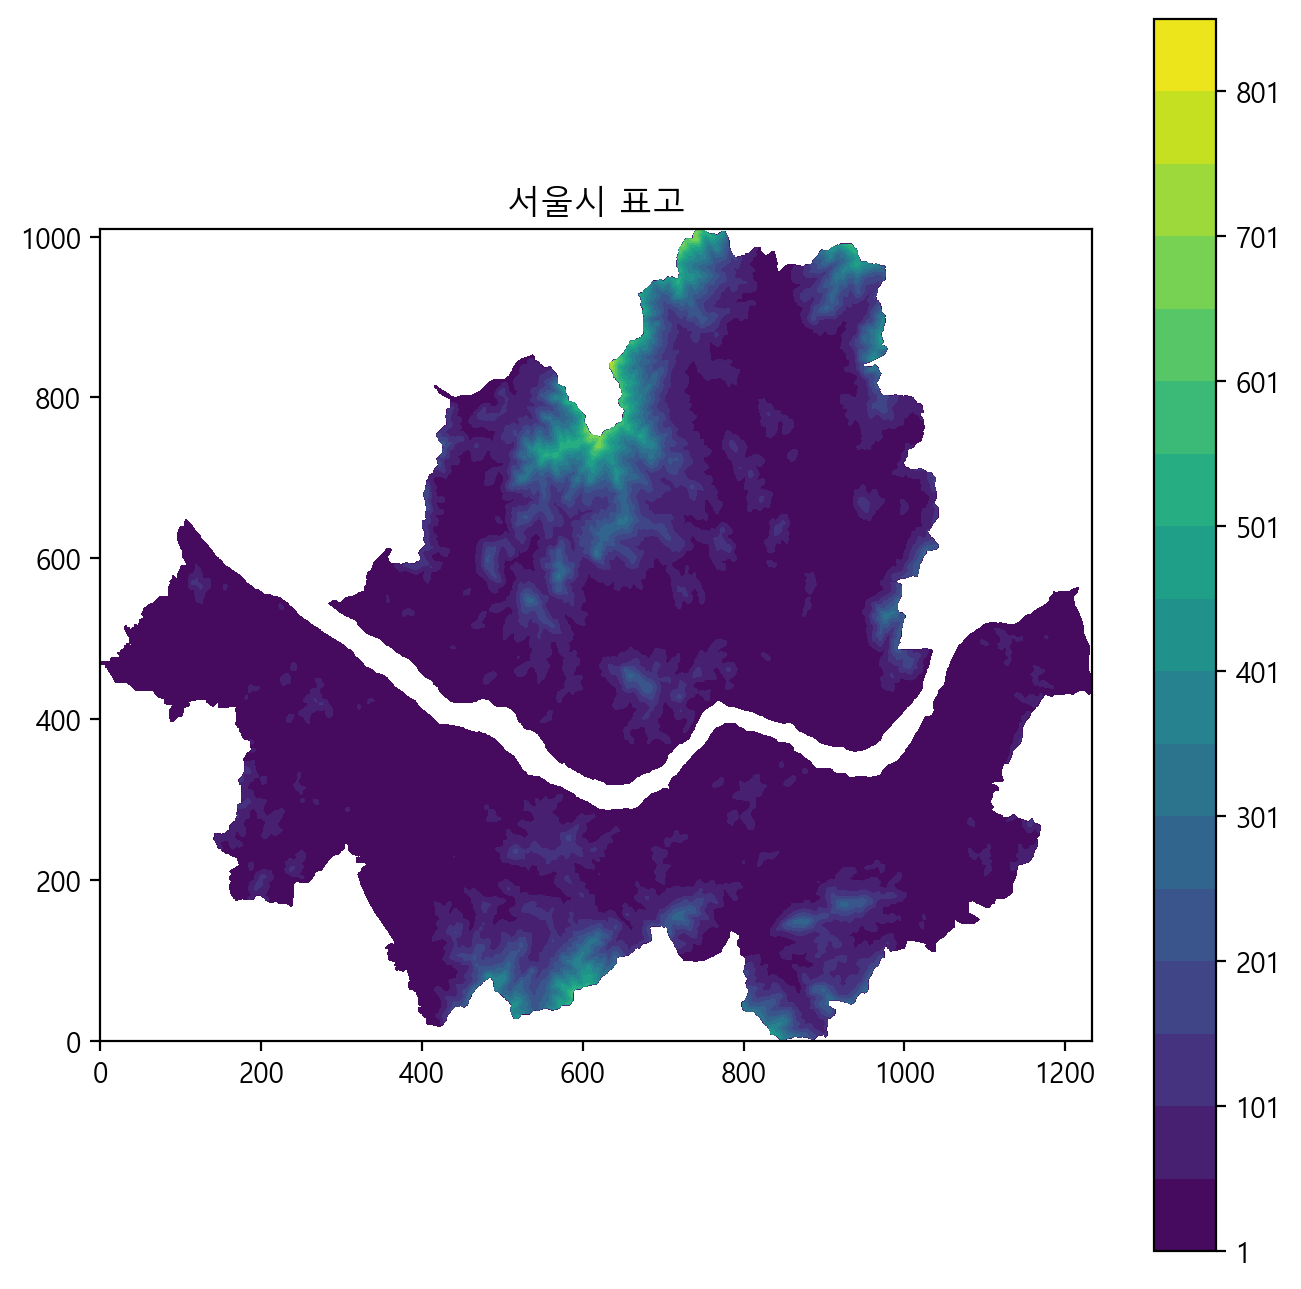

In [11]:
#Plot our data with Matplotlib's 'contourf'
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111)
plt.contourf(rArray2, cmap = "viridis", levels = list(range(1, 900, 50)))
plt.title("서울시 표고")
cbar = plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [12]:
# 3차원 시각화 
fig = go.Figure(data=[go.Surface(z=rArray2, colorscale='speed_r')])

camera = dict(
    up=dict(x=0, y=-1, z=0.5), center=dict(x=0, y=0, z=0), eye=dict(x=-0.1, y=-0.2, z=0.5)
)

fig.update_layout(scene_camera=camera, title='서울 지형', autosize=False, width=1500, height=900, margin=dict(l=65, r=50, b=65, t=90))
fig.update_layout(      # z 스케일 조정 및 axis 축 안보이게 처리 
    scene = dict(
        zaxis = dict(nticks=7, range=[0,7000], visible=False, showticklabels=False),
        xaxis={'visible': False, 'showticklabels': False},
        yaxis={'visible': False, 'showticklabels': False}        )
)

#fig.show()
fig.write_html("data/graph4.html")

In [13]:
# 자동 회전(Rotation) 결과 추가 생성 
x_eye = -0.25
y_eye = 2
z_eye = 0.5

fig.update_layout(
         title='Animation Test',
         width=1900,
         height=1000,
         scene_camera_eye=dict(x=x_eye, y=y_eye, z=z_eye),
        #  updatemenus=[dict(type='buttons',
        #           showactive=True,
        #           y=0,
        #           x=0.8,
        #           xanchor='left',
        #           yanchor='bottom',
        #           pad=dict(t=45, r=5),
        #           buttons=[dict(label='Play',
        #                          method='animate',
        #                          args=[None, dict(frame=dict(duration=1, redraw=True), 
        #                                                      transition=dict(duration=0),
        #                                                      fromcurrent=True,
        #                                                      mode='immediate'
        #                                                     )]
        #                                     )
        #                               ]
        #                       )
        #                 ]
)

def rotate_z(x, y, z, theta):
    w = x+1j*y
    return np.real(np.exp(1j*theta)*w), np.imag(np.exp(1j*theta)*w), z

frames=[]
for t in np.arange(0, 6.26, 0.1):
    xe, ye, ze = rotate_z(x_eye, y_eye, z_eye, -t)
    frames.append(go.Frame(layout=dict(scene_camera_eye=dict(x=xe, y=ye, z=ze))))
fig.frames=frames

#fig.show()
fig.write_html("data/graph5.html")

In [14]:
# 결국 행렬별 포인트 정보이므로 스캐터 차트로 뿌려도 contourf와 같은 결과를 볼 수 있음 
plt.figure(figsize=(10, 10))
plt.scatter(x, y, c=z)
plt.axis("image")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.show()

NameError: name 'x' is not defined

<Figure size 1000x1000 with 0 Axes>

끝